In [ ]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import losses
from tensorflow.keras import optimizers


import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
# Read in the dataset in .csv format into a dataframe

df_signal = pd.read_csv('/content/grive/MyDrive/NN Project Data - Signal.csv')

In [ ]:
# Analyse dataset

df_signal.shape

(1599, 12)

In [ ]:
df_signal.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [ ]:
# Checking for Null Values column-wise

(df_signal.isnull().sum()/len(df_signal))*100

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [ ]:
# Checking for Duplicate rows

print(df_signal.duplicated().value_counts())

False    1359
True      240
dtype: int64


In [ ]:
df_signal = df_signal.drop_duplicates(keep ='first')
print(df_signal.shape)

(1359, 12)


In [ ]:
df_signal.head(100)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.9960,3.33,0.48,9.4,5
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.9973,3.08,1.31,9.3,5
107,6.2,0.630,0.31,1.7,0.088,15.0,64.0,0.9969,3.46,0.79,9.3,5
108,8.0,0.330,0.53,2.5,0.091,18.0,80.0,0.9976,3.37,0.80,9.6,6


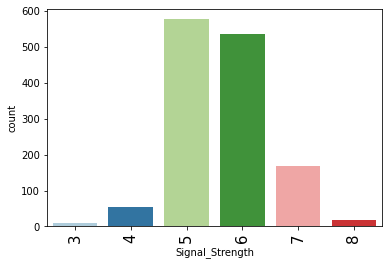

In [ ]:
# 'Signal_Strength' target variable value count plot

plt.xticks(rotation=90, fontsize=15)
sns.countplot(data=df_signal, x= 'Signal_Strength', palette="Paired") # order=df_signal[Signal_Strength].value_counts().index[:n].sort_values() 

In [ ]:
df_signal['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

Interpretation from Data Analyzed
-------------------------------------
1. The Data has 11 columns with 10 of them having float data type while 1 with the integer data type.
2.No Null values detected in any column
3. After removing duplicates the dataset has 1359 observations
4. The target variable 'Signal_Strenth' having values most concentrated at value 5 (total count 577) followed by 6 (total count 535). Rest of the unique su=ignal strength values are 7,4,8 and 3 in the order given, with much lesser concentrations.

In [ ]:
# Separating Independent and Dependent Columns to create X & y variables
X = df_signal.drop(['Signal_Strength'],axis=1)
y = df_signal[['Signal_Strength']]

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0,stratify = y)

In [ ]:
# Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(951, 11)
(408, 11)
(951, 1)
(408, 1)


Both train and test data's are in sync

In [ ]:
# Scaling Train & Test Dat
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

In [ ]:
# Machine learning SVM Model creation, fitting on train data & prediction from Test data

from sklearn import svm
from sklearn import metrics

model_svm = svm.SVC(C=1000)
model_svm.fit(X_train_scaled, y_train)
y_train_pred = model_svm.predict(X_train_scaled)

print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.9873817034700315


In [ ]:
# Converting the Target variable unique values into Labels to be able to use it to set the Output Layer of the Neural network

oneHotCols=["Signal_Strength"]
y_train = pd.get_dummies(y_train, columns=oneHotCols, drop_first=True)
y_test = pd.get_dummies(y_test, columns=oneHotCols, drop_first=True)

y_train.head()

,Signal_Strength_4,Signal_Strength_5,Signal_Strength_6,Signal_Strength_7,Signal_Strength_8
1295,0,1,0,0,0
227,0,1,0,0,0
1303,0,1,0,0,0
957,0,0,1,0,0
125,0,1,0,0,0


In [ ]:
# DESIGNING A NEURAL NETWORK

# Creating Pre-Defined Functions for choosing on Multi-layer/Single Layer Neural Network and also to choose the Number of Neurons in each of those hidden layers

from sklearn.utils.extmath import softmax


def Fit(model, Xtrain, ytrain, X_test_scaled, y_test, NoOfEpochs, bat_size, verbose_temp):
  history = model.fit(X_train_scaled, y_train, validation_data=[X_test_scaled, y_test], epochs=NoOfEpochs, batch_size=bat_size, verbose=verbose_temp)
  model.test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 1)
  Plot(history, model)

def BuildSequential_SingleLayer(model, inputDimensions, noOfClasses,neuronCountForLayer):
  model.add(Dense(neuronCountForLayer, input_dim = inputDimensions, activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(Dense(noOfClasses, activation = 'softmax'))
  _CompileWithSGD(model)
  print(model.summary())
  return model

def BuildSequential_MultiLayer(model, inputDimensions, noOfClasses, layerRepeatCount, layerNeuronCount):
  model.add(Dense(layerNeuronCount, input_dim = inputDimensions, activation = 'relu', kernel_initializer = 'he_uniform'))
  for i in range(1,layerRepeatCount):
    model.add(Dense(layerNeuronCount, activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(Dense(noOfClasses, activation = 'softmax'))
  _CompileWithAdam(model)
  print(model.summary())
  return model

def BuildSequential_MultiLayer_Funnel(model, inputDimensions, noOfClasses, reduceNeuronBy, firstLayerNeuronCount):
  model.add(Dense(firstLayerNeuronCount, input_dim = inputDimensions, activation = 'relu', kernel_initializer = 'he_uniform'))
  for neuronCount in range(firstLayerNeuronCount-reduceNeuronBy, noOfClasses, -reduceNeuronBy):
    model.add(Dense(neuronCount, activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(Dense(noOfClasses, activation = 'softmax'))
  _CompileWithSGD(model)
  print(model.summary())
  return model 

def _CompileWithAdam(model):
  adam = optimizers.Adam(lr=1e-2, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07) # epsilon = 1e-08 can be tried, lr=1e-3 
  model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

def _CompileWithSGD(model):
  sgd = optimizers.SGD(lr=0.01, momentum = 0.66) # lr=0.01
  model.compile(loss=losses.categorical_crossentropy, optimizer = sgd, metrics=['accuracy'])

def Plot(history, model):
  h1=history.history
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  ax = sns.lineplot(y=h1['val_accuracy'], x=range(len(h1['val_accuracy'])),label = "Val_accuracy", palette = "binary")
  ax.set(xlabel = 'Epochs', ylabel = 'Val_accuracy')
  ax = sns.lineplot(y=h1['accuracy'], x=range(len(h1['val_accuracy'])), label = "Accuracy", palette = "binary")
  ax.set(xlabel = 'Epochs', ylabel = 'Accuracy')
  plt.title('Epochs Vs Accuracy (Acc = '+str(model.test_accuracy[1])+')')  # (Acc = '+str(model.test_accuracy)+')
  #
  plt.subplot(1,2,2)
  ax = sns.lineplot(y=h1['val_loss'], x=range(len(h1['val_loss'])),label = "Val_Loss", palette = "binary")
  ax.set(xlabel = 'Epochs', ylabel = 'Val_Loss')
  ax = sns.lineplot(y=h1['loss'], x=range(len(h1['val_loss'])), label = "Loss", palette = "binary")
  ax.set(xlabel = 'Epochs', ylabel = 'Loss')
  plt.title('Epochs Vs Loss (Acc = '+str(model.test_accuracy[1])+')')  # (Acc = '+str(model.test_accuracy)+')
  

In [ ]:
'''
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]
'''

'\ncheckpoint = ModelCheckpoint("model_weights.h5",monitor=\'val_accuracy\',\n                            save_weights_only=True, mode=\'max\',verbose=1)\nreduce_lr = ReduceLROnPlateau(monitor=\'val_loss\',factor=0.1,patience=2,min_lr=0.00001,model=\'auto\')\n\ncallbacks = [checkpoint,reduce_lr]\n'

Running for Single Layer Model with Neuron Count: 6
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 5)                 35        
                                                                 
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
8/8 - 1s - loss: 2.1171 - accuracy: 0.0915 - val_loss: 1.9633 - val_accuracy: 0.1054 - 1s/epoch - 139ms/step
Epoch 2/10
8/8 - 0s - loss: 1.8812 - accuracy: 0.1325 - val_loss: 1.7574 - val_accuracy: 0.1618 - 51ms/epoch - 6ms/step
Epoch 3/10
8/8 - 0s - loss: 1.6975 - accuracy: 0.2072 - val_loss: 1.6108 - val_accuracy: 0.2255 - 61ms/epoch - 8ms/step
Epoch 4/10
8/8 - 0s - loss: 1.5666 - 

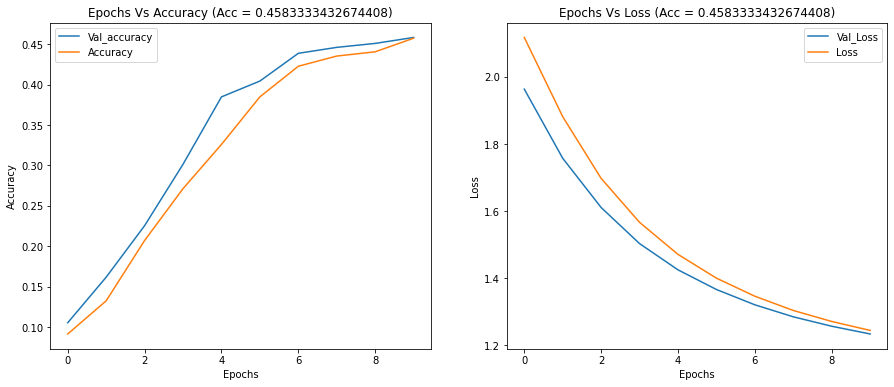

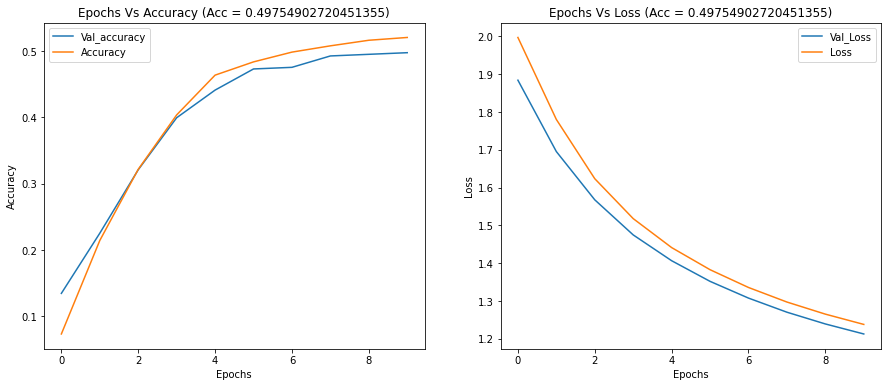

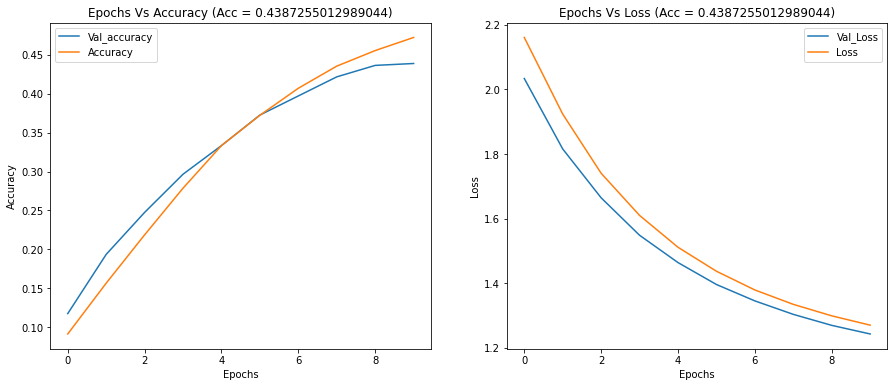

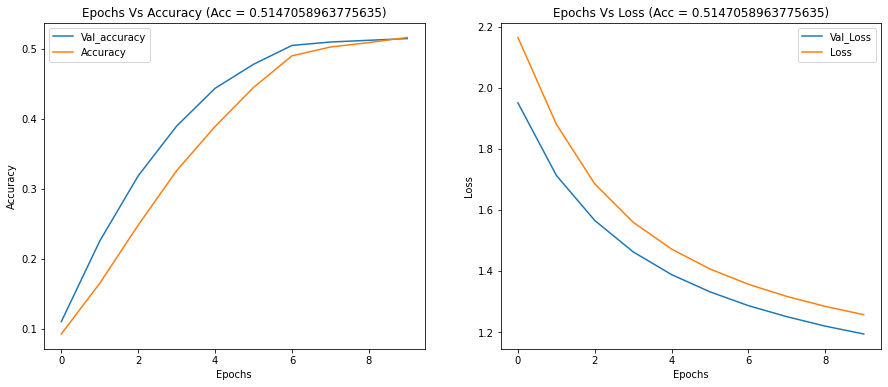

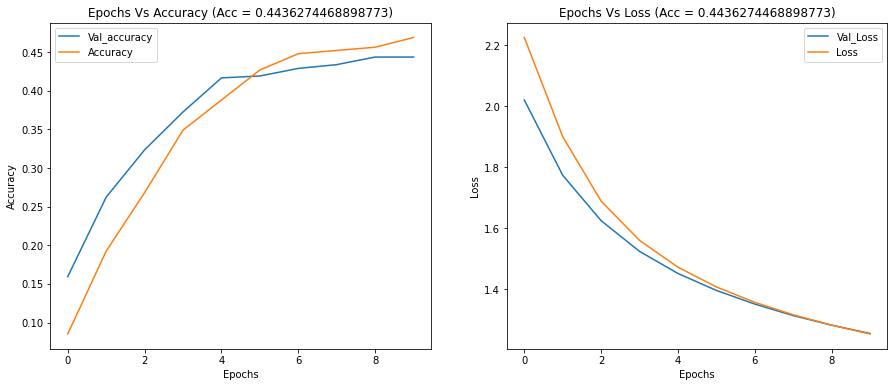

In [ ]:
# Checking on Best possible Neural Network Model with Single Hidden Layer

if(True):
  neuroncount = range(6,11,1)
  for i in range (len(neuroncount)):
    backend.clear_session()
    random.seed(42)
    tf.random.set_seed(42)
    
    print("Running for Single Layer Model with Neuron Count:", neuroncount[i])
    model = Sequential()
    model = BuildSequential_SingleLayer(model, X_train_scaled.shape[1], y_train.shape[1], neuroncount[i])
    Fit(model, X_train_scaled, y_train, X_test_scaled, y_test, 10, 128, 2)
    

Inference from above Plots
-------------------------------
1. Best Validation Accuracy attained is 49.75% with 7 Neurons in Single Hidden layer network without convergence between Training and Validation Loss.
2. Better convergence between Training and Validation Loss seen with Validation accuracy of 45.83 %

Running for Multi Layer Model with layers of: 2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
8/8 - 1s - loss: 2.3076 - accuracy: 0.1746 - val_loss: 1.5668 - val_accuracy: 0.2843 - 677ms/epoch - 85ms/step
Epoch 2/10
8/8 - 0s - loss: 1.3659 - accuracy: 0.4111 - val_loss: 1.2609 - val_accuracy: 0.4387 - 46ms/epoch - 6ms/step
Epoch 3/10
8/8 - 0s - loss:

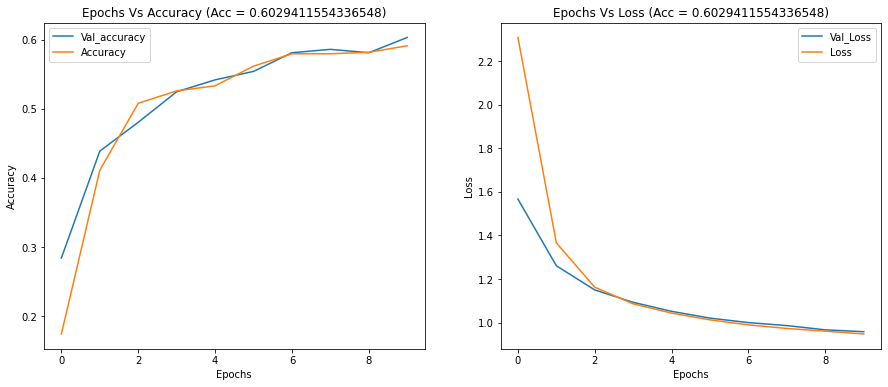

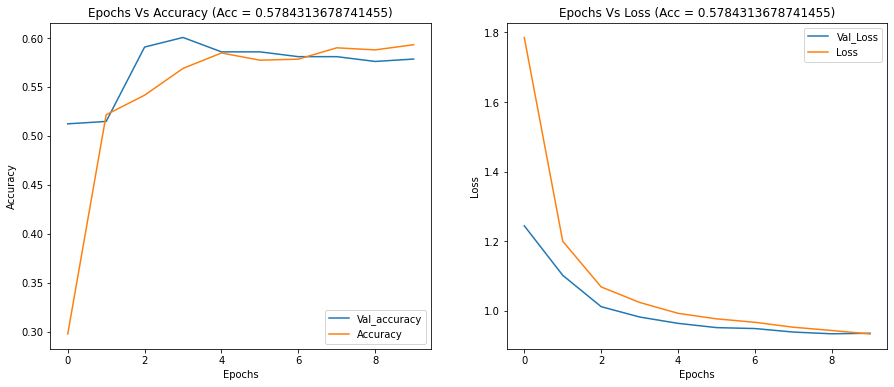

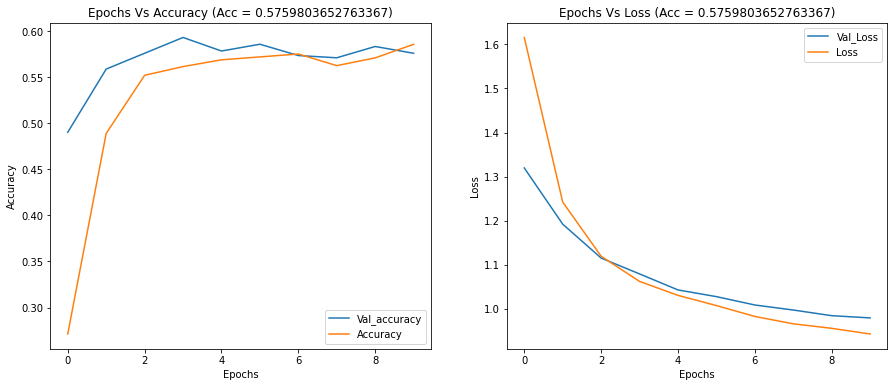

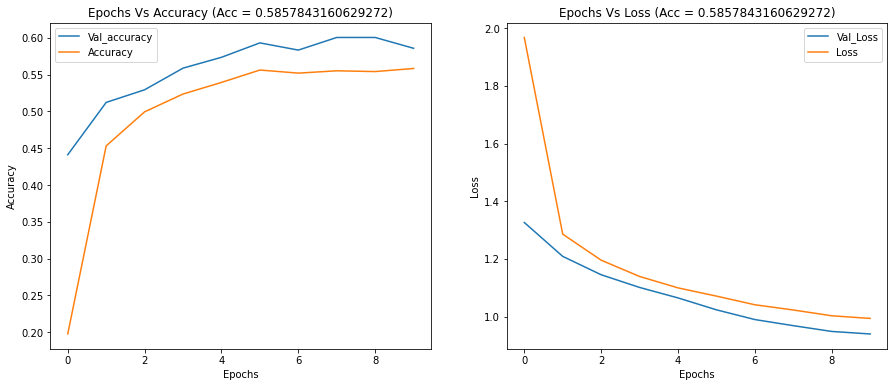

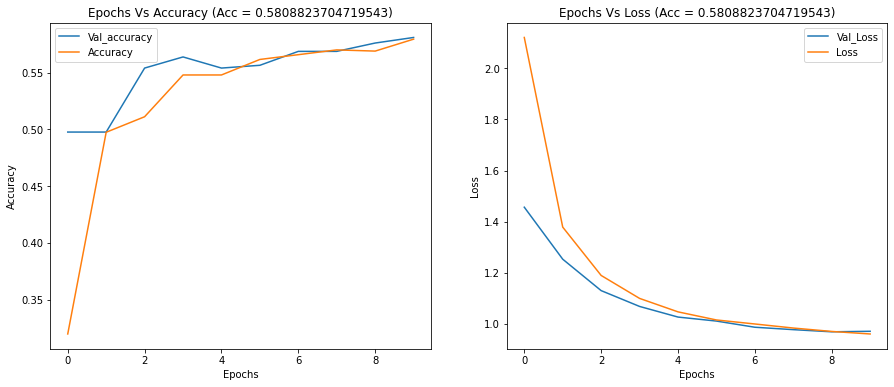

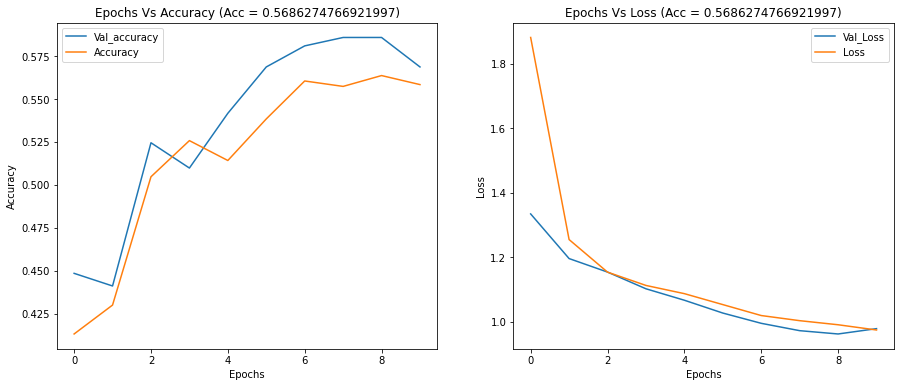

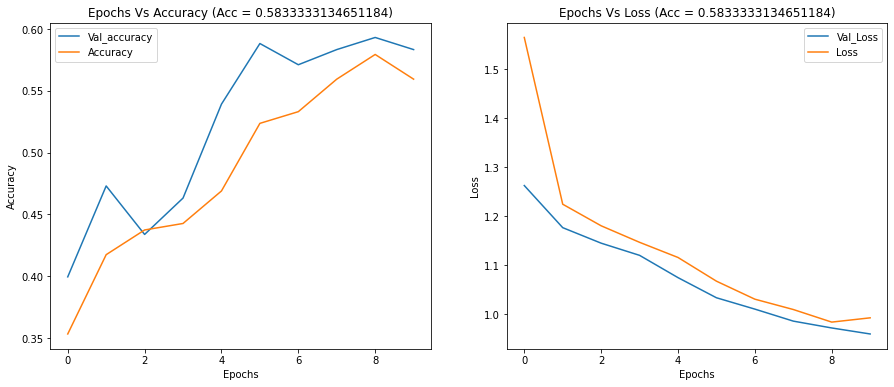

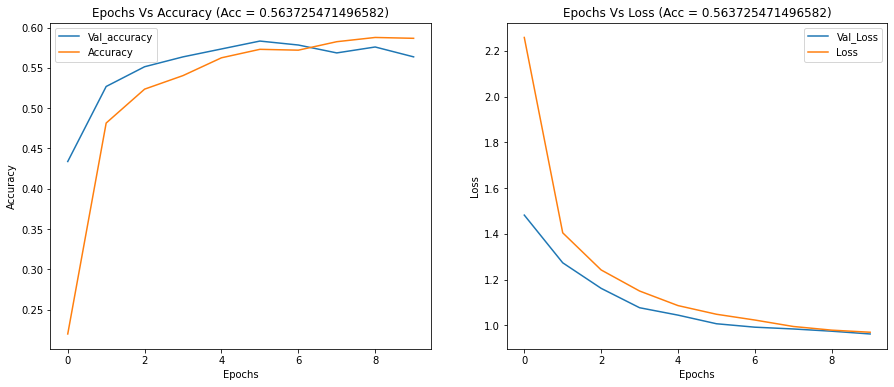

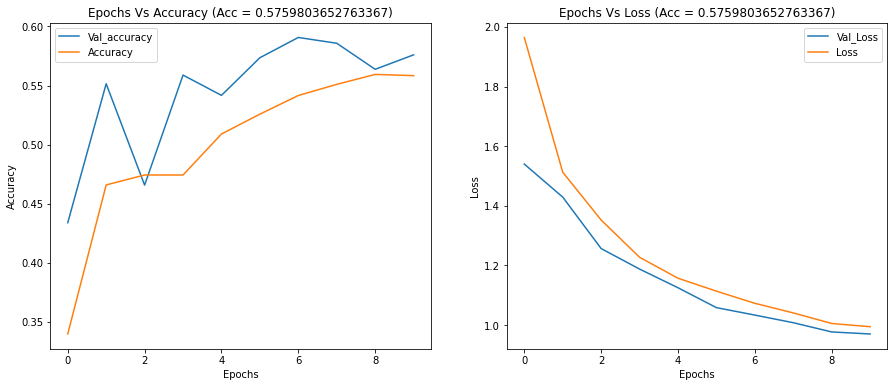

In [ ]:
if(True):
  layeradd = range(2,11,1)
  for i in range (len(layeradd)):
    backend.clear_session()
    random.seed(42)
    tf.random.set_seed(42)
    print("Running for Multi Layer Model with layers of:", layeradd[i])
    model = Sequential()
    model = BuildSequential_MultiLayer(model, X_train_scaled.shape[1], y_train.shape[1], layeradd[i], 10)
    Fit(model, X_train_scaled, y_train, X_test_scaled, y_test, 10, 128, 2)

Inference From The Plots Above
-------------------------------
Best Validation Accuracy attained is 60.75% with 2 Hidden Layers having 10 Neurons each, followed by 58.08 % with 6 Hidden Layers having 10 Neurons each. Some level of convergence between Training and Validation Accuracy/Loss also seen.

Running for Multi Layer Model with layers of: 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 9)                 99        
                                                                 
 dense_2 (Dense)             (None, 8)                 80        
                                                                 
 dense_3 (Dense)             (None, 7)                 63        
                                                                 
 dense_4 (Dense)             (None, 6)                 48        
                                                                 
 dense_5 (Dense)             (None, 5)                 35        
                                                                 
Total pa

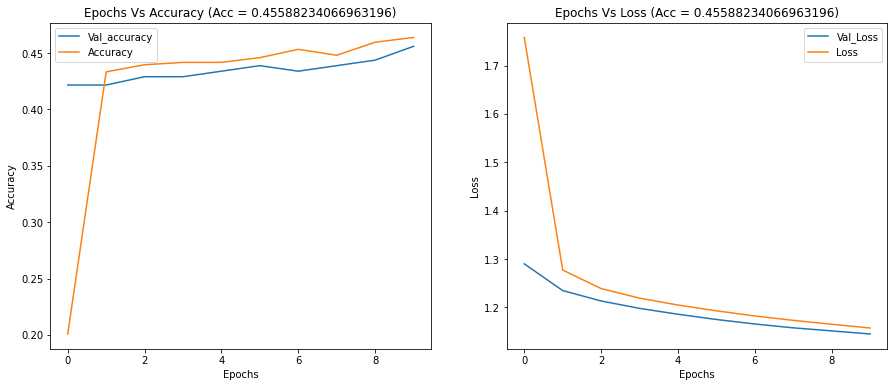

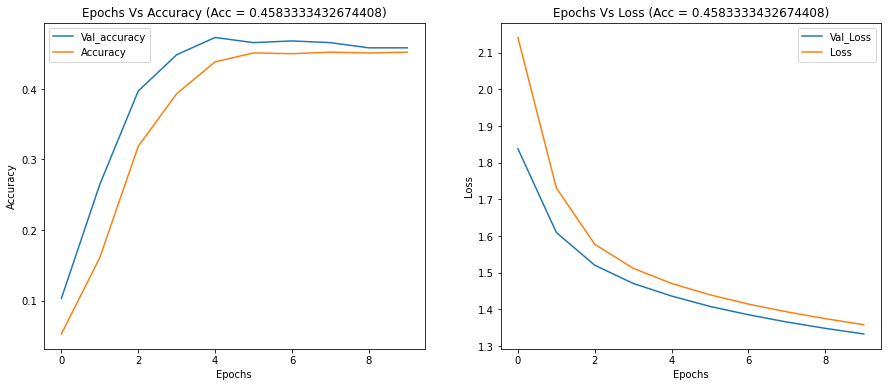

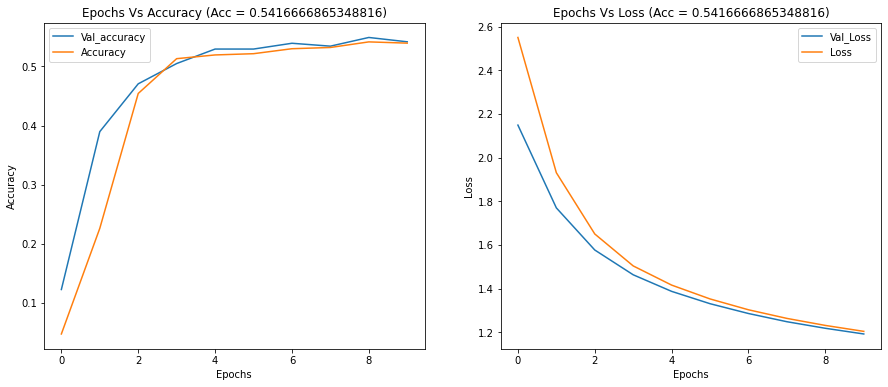

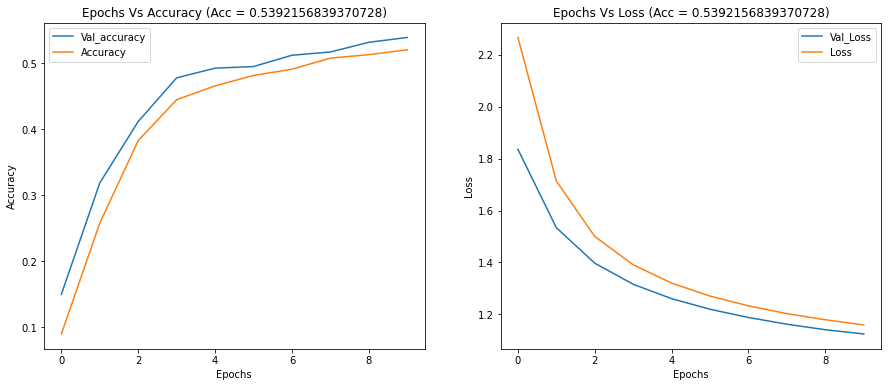

In [ ]:
# Checking for the Multi-Layer Architecture with same number of neurons in each layer that gives the best Model performance

if(True):
  reduceNeuronBy = range(1,5,1)
  for i in range (len(reduceNeuronBy)):
    backend.clear_session()
    random.seed(42)
    tf.random.set_seed(42)
    print("Running for Multi Layer Model with layers of:", reduceNeuronBy[i])
    model = Sequential()
    model = BuildSequential_MultiLayer_Funnel(model, X_train_scaled.shape[1], y_train.shape[1], reduceNeuronBy[i], 10)
    Fit(model, X_train_scaled, y_train, X_test_scaled, y_test, 10, 128, 2)

Inference From Plots Above For Multi-Layer Funnel Shaped Neural Network Architecture
------------------------------------------------------------------------------------------

2 Hidden Layer Architecture with 10 and 7 Neurons each having a Validation Accuracy of 54.16% followed by 2 Hidden Layer Architecture with 10 and 6 Neurons each having a Validation Accuracy of 53.92%.
Some level of convergence between Training & Validation accuracy/loss is also seen in case of the former. 

# **MODEL -1**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                 40        
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
8/8 - 1s - loss: 2.8050 - accuracy: 0.0820

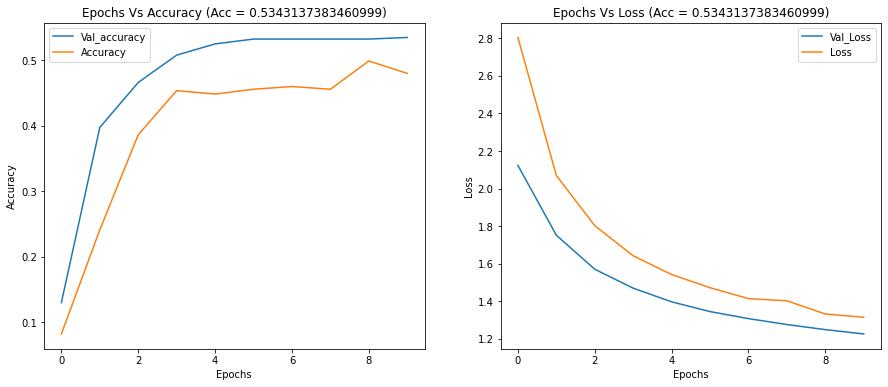

In [ ]:
# 3.D. & E. Questions

# Introducing Drop Out in the 2-Layer Funnel Architecture with 10 & 7 Neurons in each layer to see if it improves the model performance
# Stochastic Gradient Optimizer Used

backend.clear_session()

random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

_CompileWithSGD(model)

print(model.summary())
history = model.fit(X_train_scaled, y_train, validation_data= [X_test_scaled, y_test], epochs=10, batch_size=128, verbose=2)
model.test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 1)
Plot(history, model)

# **MODEL -2**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dense_2 (Dense)             (None, 5)                 40        
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/117
4/4 - 1s - loss: 2.7294 - accuracy: 0.0368 - val_loss: 2.5160 - val_accuracy: 0.0490 - 589ms/epoch - 147ms/step
Epoch 2/117
4/4 - 0s - loss: 2.3339 - accuracy: 0.0641 - val_loss: 2.1545 - val_accuracy: 0.1225 - 32ms/epoch - 8ms/step
Epoch 3/117
4/4 - 0s - loss: 2.0228 - accuracy: 0.1472 - val_loss: 1.921

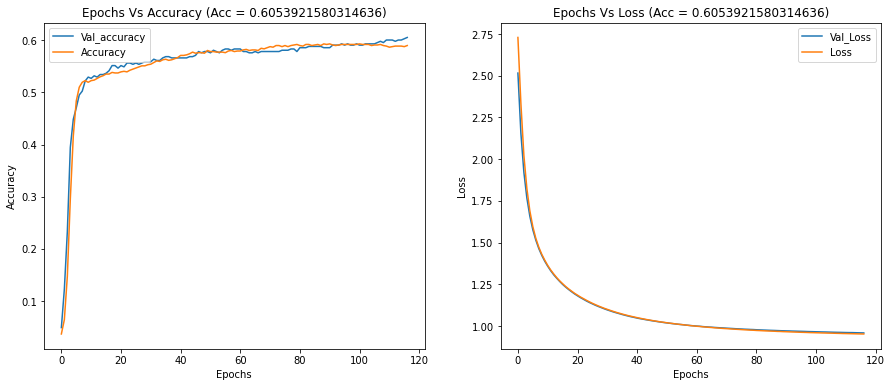

In [ ]:
# Changing/increasing the 'epoch' and 'batch_size' values in the 2-Layer Funnel Architecture with 10 & 7 Neurons in each improves the model performance 
# without drop out introduced
# Stochastic Gradient Optimizer Used

backend.clear_session()

random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model.add(Dense(7,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5, activation = 'softmax'))

_CompileWithSGD(model)

print(model.summary())
history = model.fit(X_train_scaled, y_train, validation_data= [X_test_scaled, y_test], epochs=117, batch_size=256, verbose=2) #180/400/450,256 - 59.80% with best convergence ever both accuracies & losses
model.test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 1)
Plot(history, model)

Inference from Above plot
--------------------------
1. Introduction of Drop Out layer in the 2 Hidden Layer Architecture with 10 & 7 Neurons each greatly increased the gaps between the Training & Validation Loss & Accuracy curves not seen otherwise with the base model.

2. But increase of epochs to 117 and Batch size to 256 instead (without drop out) resulted in curves of Training and Validation Accuracies/Losses converging very well and increase in the Validation accuracy to 60.53% (from the base model accuracy of 54.16%) instead.

# **MODEL - 3**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 5)                 40        
                                                                 
Total params: 305
Trainable params: 271
Non-trainable pa

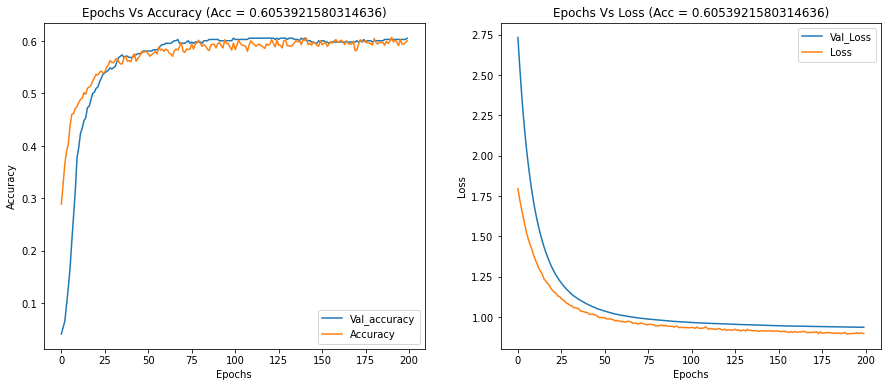

In [ ]:
# Introducing Batch Normalization along  with the changed epoch and batch_size values

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(7,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(5, activation = 'softmax'))

_CompileWithSGD(model)

print(model.summary())
history = model.fit(X_train_scaled, y_train, validation_data= [X_test_scaled, y_test], epochs=200, batch_size=256, verbose=2) #180, 256 - 59.80% god enough convergence on lossesbut can be improved
model.test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 1)
Plot(history, model)

Inference From Introduction of Batch Normalization
----------------------------------------------------
Does not help improve the model as increases the gap between Training and Validation Losses (convergence disrupted) comparatively

# **MODEL - 4**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                 35        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
8/8 - 1s - loss: 2.4231 - accuracy: 0.1430

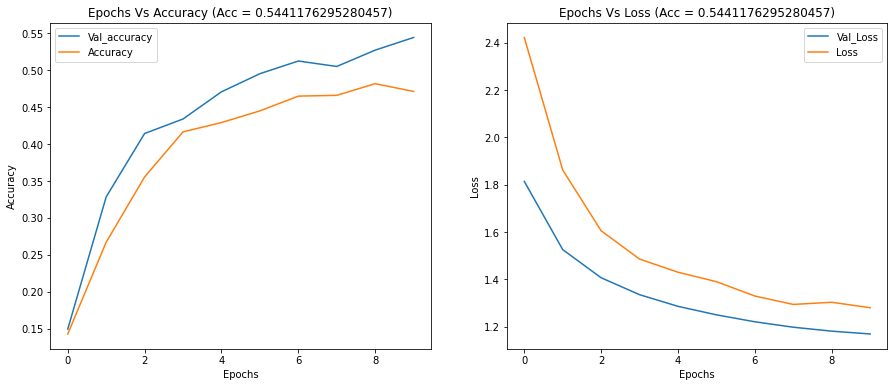

In [ ]:
# Introducing Drop out in the 2-Hidden Layer NN with 10 & 6 neurons in each layer
# Stochastic Gradient Optimizer

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime

random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

_CompileWithSGD(model)
print(model.summary())

history = model.fit(X_train_scaled, y_train, validation_data= [X_test_scaled, y_test], epochs=10, batch_size=128, verbose=2)  # epochs = 10, batch_size = 128, SGD: lr=0.01 - 54.16%, epochs = 20, batch_size = 164, Adam: lr =1e-02 - 61.27%, epochs=30, batch_size=164, verbose=2,  Adam: lr =1e-02 - 61.76%,
# epochs=60, batch_size=164, verbose=2, Adam :lr-1e-2 - 59.55% curves starts touching each other, epochs=65, 59.06%, epochs=70, 60.53% gap between val loss and loss has become very low- starting to touch each other more
model.test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 1)
Plot(history, model)


# **MODEL - 5**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                 35        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/120
8/8 - 1s - loss: 2.2423 - accuracy: 0.178

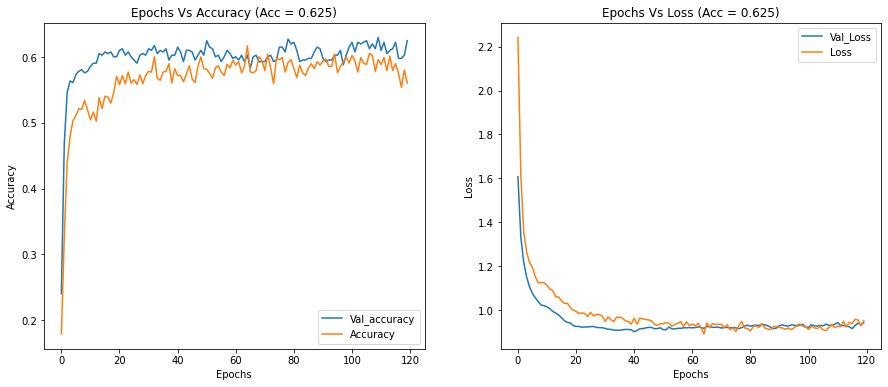

In [ ]:
# Introducing Adam Optimizer instead and increased epoch of 120 with drop out included gives even better accuracy

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime

random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))


_CompileWithAdam(model)
print(model.summary())

history = model.fit(X_train_scaled, y_train, validation_data= [X_test_scaled, y_test], epochs=120, batch_size=128, verbose=2)
model.test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 1)
Plot(history, model)

Inference from the Plot Above For Model 5
---------------------------------------------
Even though the Loss and accuracy curves especially for the Training set is jumping up and down(sharp variations due to the drop out introduced which is acceptable since its giving better accuracie with Validation set) the convergence between the Training and Validation Loss curves is good enough with the best Validation accuracy attained till now - 62.50%.

Though here we can see the gap between the Training & Validation Accuracy curves are a little higher as compared to Model which is not preferred

# **MODEL - 6**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 5)                 35        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/350
4/4 - 1s - loss: 2.4386 - accuracy: 0.0757 - val_loss: 2.1668 - val_accuracy: 0.0760 - 578ms/epoch - 145ms/step
Epoch 2/350
4/4 - 0s - loss: 2.0553 - accuracy: 0.0967 - val_loss: 1.8388 - val_accuracy: 0.1446 - 32ms/epoch - 8ms/step
Epoch 3/350
4/4 - 0s - loss: 1.7841 - accuracy: 0.2008 - val_loss: 1.646

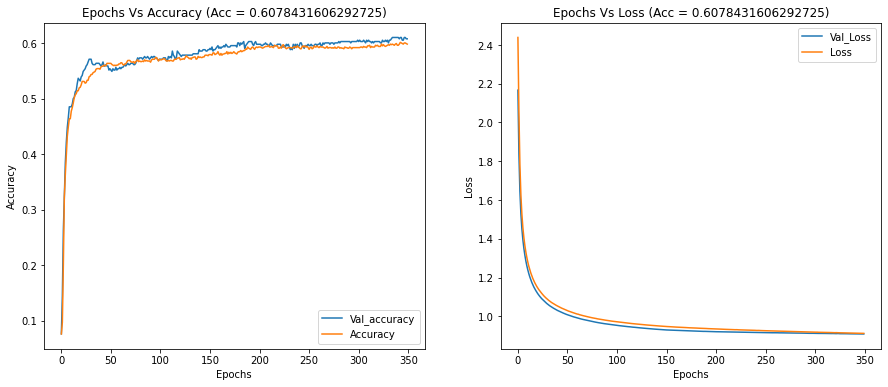

In [ ]:
# Changing/increasing the 'epoch' and 'batch_size' values in the 2-Layer Funnel Architecture with 10 & 6 Neurons in each improves the model performance  
# without drop out introduced
# Stochastic Gradient Optimizer

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime

random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model.add(Dense(6,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5, activation = 'softmax'))

_CompileWithSGD(model)
print(model.summary())

history = model.fit(X_train_scaled, y_train, validation_data= [X_test_scaled, y_test], epochs=350, batch_size=256, verbose=2) # 350, 256 - 60.78% with great convergence both accuracies & losses
model.test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 1)
Plot(history, model)


Inference From The Plots Above For Model 6 & 4
------------------------------------------------
1. Introduction of Drop out of 0.2 in 2-Hidden Layer Neural Network with 10 and 6 Neurons each, resulted in much greater gaps between the Training and Validation Loss & Accuracy Curves causing divergence instead of the desired convergence, though the Validation Accuracy increased to 54.14% from 53.92% (Base Model)

2. Instead of Drop Out, increasing the 'epoch' to 350 from 10 with a batch_size of 256 not only increased the Validation Accuracy further to 60.78% but also now the Training & Validation Loss curves converge smoothly. Similar trend is seen with accuracies as well

# **MODEL - 7**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
8/8 - 1s - loss: 2.5464 - accuracy: 0.1935

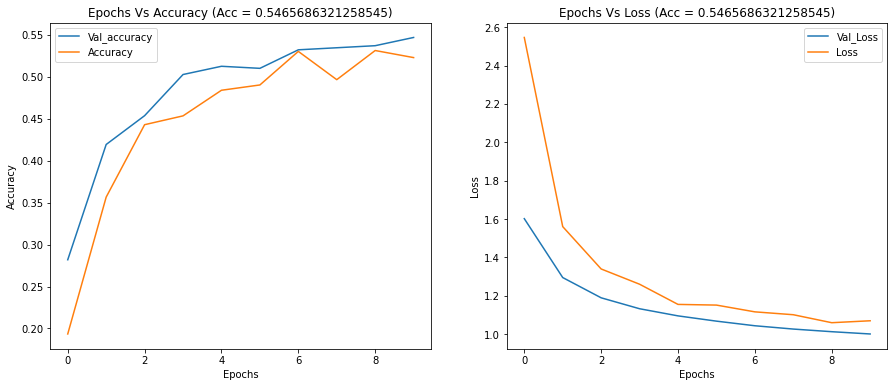

In [ ]:
# Introducing Drop Out in the 2-Hidden Layer Architecture with 10 Neurons in each layer to see if it improves the model performance
# Adam Optimizer Used (Gives better results interms of convergence and validation accuracy here)

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

#_CompileWithSGD(model)
_CompileWithAdam(model)

print(model.summary())
history = model.fit(X_train_scaled, y_train, validation_data= [X_test_scaled, y_test], epochs=10, batch_size=128, verbose=2)
model.test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 1)
Plot(history, model)

# **MODEL - 8**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
8/8 - 1s - loss: 2.3076 - accuracy: 0.1746 - val_loss: 1.5668 - val_accuracy: 0.2843 - 710ms/epoch - 89ms/step
Epoch 2/15
8/8 - 0s - loss: 1.3659 - accuracy: 0.4111 - val_loss: 1.2609 - val_accuracy: 0.4387 - 64ms/epoch - 8ms/step
Epoch 3/15
8/8 - 0s - loss: 1.1624 - accuracy: 0.5079 - val_loss: 1.1500 - 

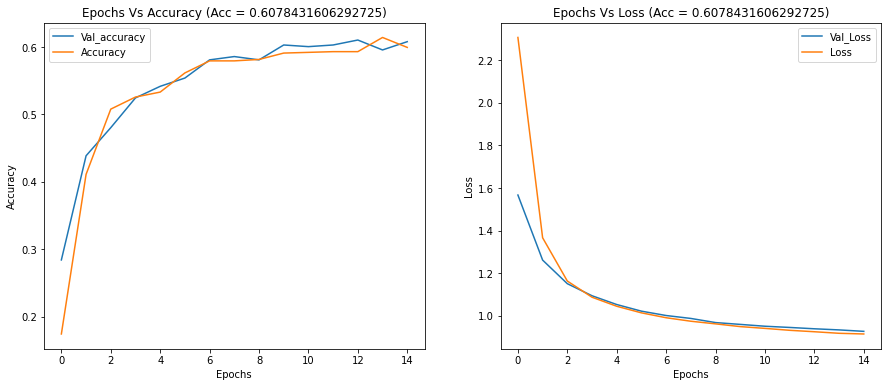

In [ ]:
# Changing the epochs instead 

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(10,activation='relu',input_dim = X_train_scaled.shape[1],kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5, activation = 'softmax'))

_CompileWithAdam(model)

print(model.summary())
history = model.fit(X_train_scaled, y_train, validation_data= [X_test_scaled, y_test], epochs=15, batch_size=128, verbose=2) # 15, 128
model.test_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 1)
Plot(history, model)

Inference from the Plots Above for Model - 7 and 8
-----------------------------------------------------
1. Introduction of drop out disrupted the convergence of Training & Validation loss & accuracy curves and brought down the Validation accuracy to a highest of 54.65% from 60.29%
2. Instead increase in epochs to 150 resulted in a better convergence much similar to the base model and also increased the highest found validation accuracy to 60.78%


**Models 6,8,5 and 2 were found to be the best performing models with failrly good convergence seen with Training & Validation Loss & Accuracy curves with their respective highest found Validation Accuracies as 60.78 %, 60.78 %, 62.50 % and 60.53 % respectively.**